In [16]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [17]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_9a265c4038aa40088291337d94764d7f = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='p1UNE8gkryo9CeUaGg5td81ff5J0b-Fy1rQefNSxWPKP',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_9a265c4038aa40088291337d94764d7f.get_object(Bucket='sngaporedataanalysis-donotdelete-pr-2nhapxlzs3ooue',Key='covid_19_clean_complete.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data= pd.read_csv(body)
df=data.set_index(['Date'])
df.head()

,Province/State,Country/Region,Lat,Long,Confirmed,Deaths,Recovered,Active,WHO Region
Date,,,,,,,,,
2020-01-22,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,Eastern Mediterranean
2020-01-22,NaN,Albania,41.15330,20.168300,0,0,0,0,Europe
2020-01-22,NaN,Algeria,28.03390,1.659600,0,0,0,0,Africa
2020-01-22,NaN,Andorra,42.50630,1.521800,0,0,0,0,Europe
2020-01-22,NaN,Angola,-11.20270,17.873900,0,0,0,0,Africa


In [42]:
df.sort_values(['Confirmed'],ascending=False,axis=0,inplace=True)
df_confirmed=df[['Confirmed']]
df_confirmed=df_confirmed.head(70)
df_confirmed

,Confirmed
Date,
2020-07-27,4290259
2020-07-26,4233923
2020-07-25,4178970
2020-07-24,4112531
2020-07-23,4038816
...,...
2020-06-06,1926639
2020-06-05,1903907
2020-07-13,1884967


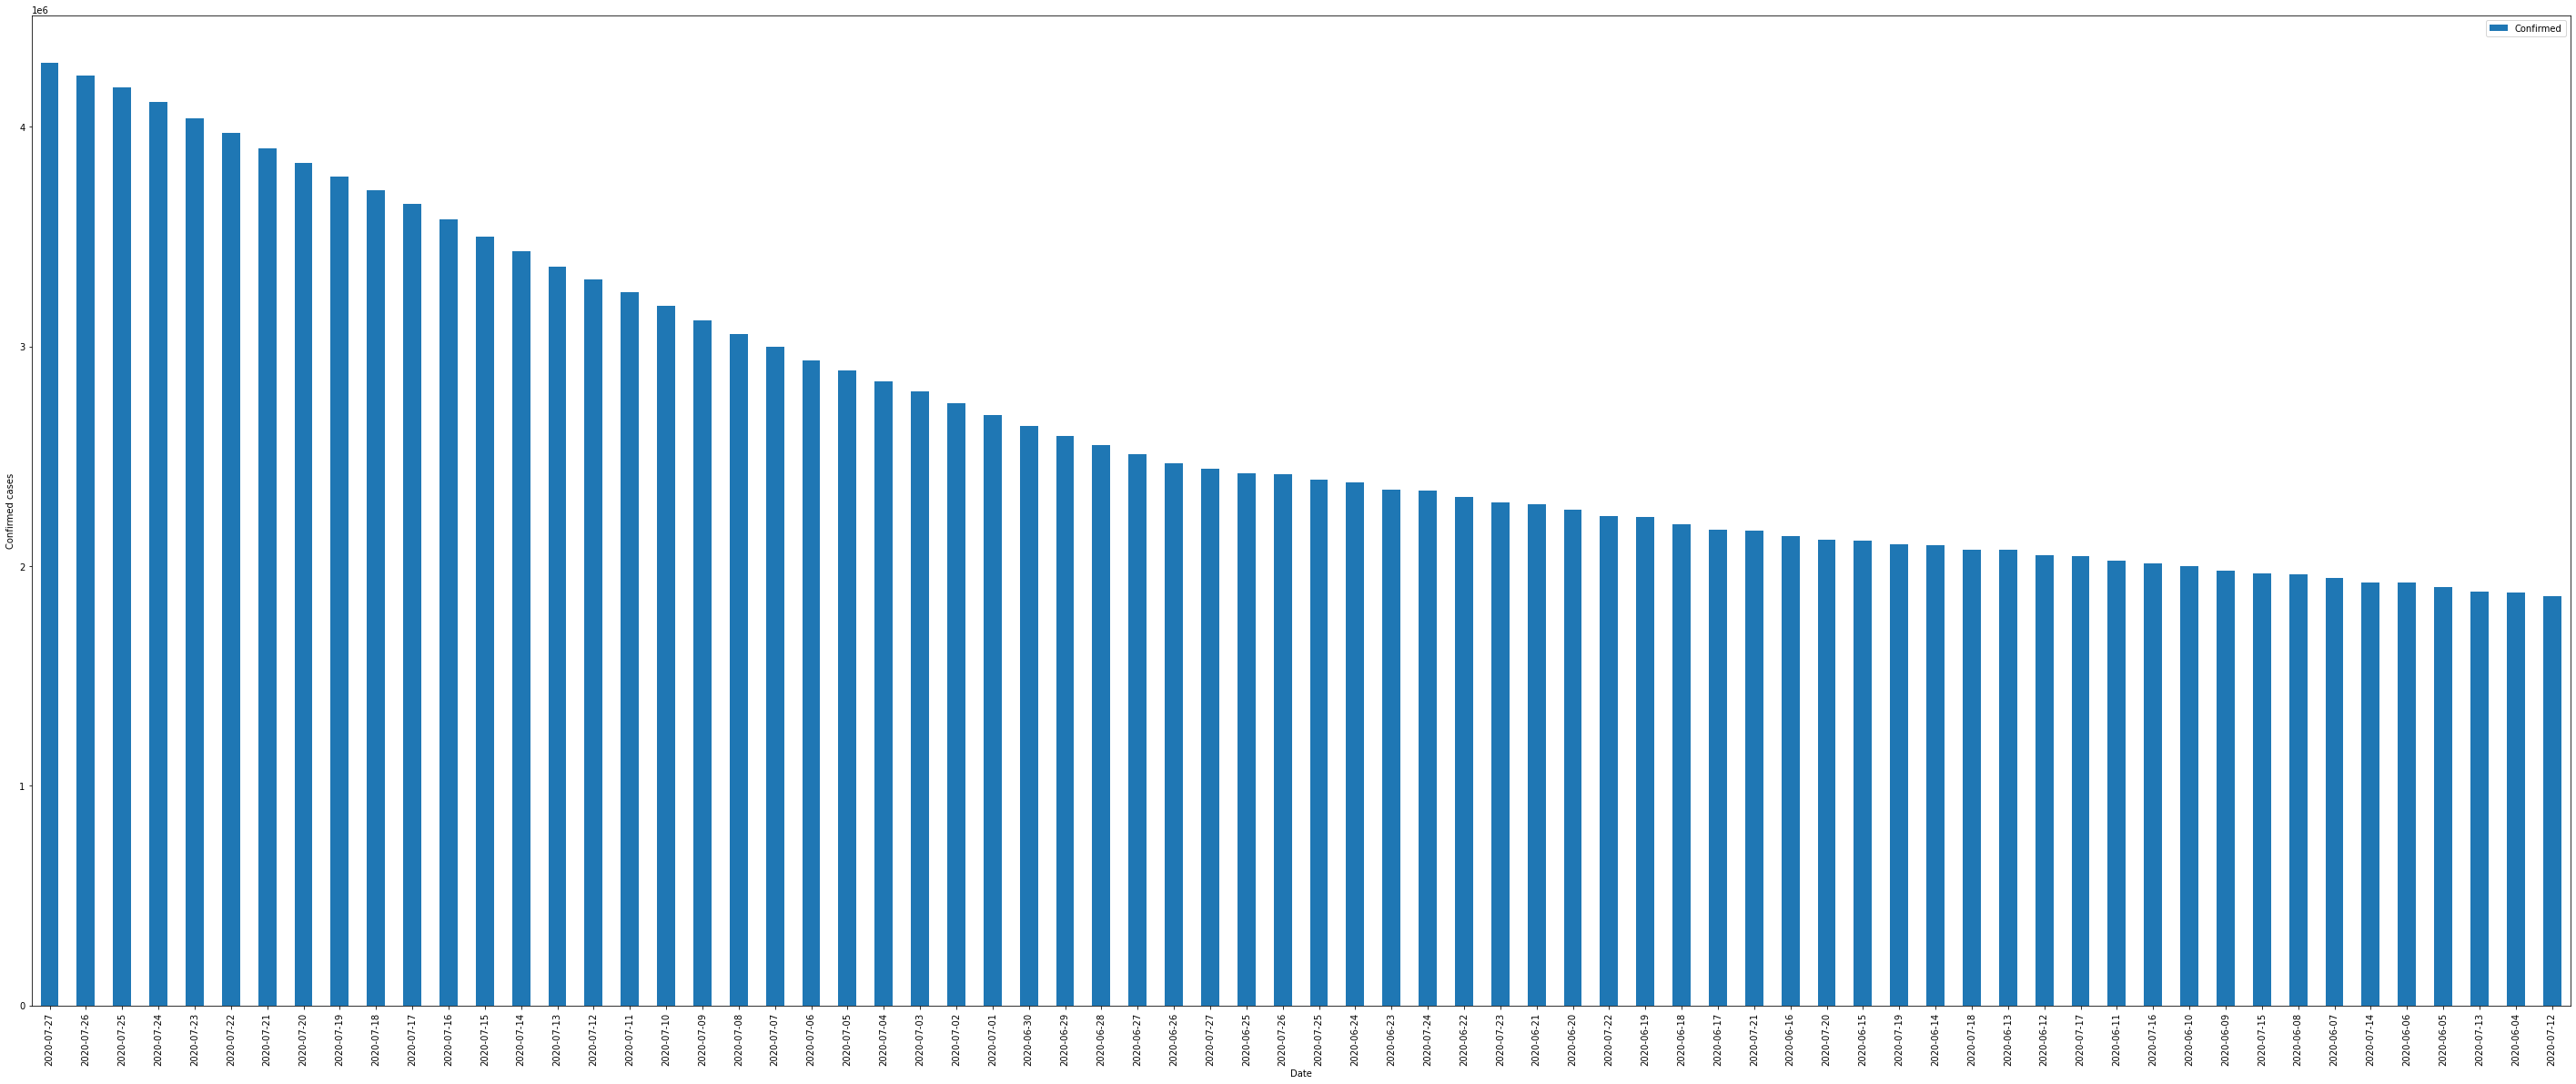

In [43]:
### graph showing confirmed cases are high during the month of july 
df_confirmed.plot(kind='bar',figsize=(50,20))
plt.xlabel('Date')
plt.ylabel('Confirmed cases')
plt.show()